In [393]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [394]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [139]:
len(wine_red), len(wine_white)

(1599, 4898)

In [140]:
wine_red.head()

wine_white.head()

len(wine_red), len(wine_white)

(1599, 4898)

In [141]:
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

In [142]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine_red['quality'], random_state=42)

In [143]:
from sklearn.tree import DecisionTreeRegressor 

"""
DecisionTreeRegressor(criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                      random_state=None, max_leaf_nodes=None, **kwargs)
                      
# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample            

# random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; 
If RandomState instance, random_state is the random number generator; 
If None, the random number generator is the RandomState instance used by np.random.
"""
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [144]:
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [145]:
tree_reg.
tree_reg.feature_importances_

array([0.04066245, 0.11789274, 0.05642251, 0.04800987, 0.05040392,
       0.04315501, 0.06753604, 0.06813332, 0.08474791, 0.15033221,
       0.272704  ])

In [146]:
list(zip(X.columns,tree_reg.feature_importances_))

[('fixed acidity', 0.040662454211478245),
 ('volatile acidity', 0.11789273847146868),
 ('citric acid', 0.05642251134374037),
 ('residual sugar', 0.04800987067058668),
 ('chlorides', 0.05040391895816014),
 ('free sulfur dioxide', 0.0431550126182432),
 ('total sulfur dioxide', 0.06753604114006544),
 ('density', 0.06813332090170264),
 ('pH', 0.08474791479615185),
 ('sulphates', 0.15033221220948342),
 ('alcohol', 0.2727040046789193)]

In [147]:
tree_reg.max_features_

11

In [148]:
# n_features_ : int
# The number of features when fit is performed.
tree_reg.n_features_

11

In [117]:
# n_outputs_ : int
# The number of outputs when fit is performed.
tree_reg.n_outputs_

1

In [118]:
tree_reg.tree_.node_count

635

In [119]:
tree_reg.tree_.max_depth

17

In [112]:
## dot file

# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(tree_reg, out_file ='tree.dot',  feature_names =X.columns)  

### overfitting

In [97]:
tree_reg.fit(train_X, train_y)
train_pred = tree_reg.predict(train_X)
test_pred = tree_reg.predict(test_X)

In [106]:
tree_reg.score(train_X, train_y)

1.0

In [107]:
tree_reg.score(test_X, test_y)

0.13710081282021658

array([5., 5., 5., ..., 5., 5., 6.])

In [104]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_pred, train_y)

0.0

In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_pred, test_y)

0.56

In [89]:
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor(random_state=42)
cross_val_score(tree_reg, X, y, cv=5)

ImportError: cannot import name 'mean_squared_error'

In [56]:
import sklearn
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

# Classification

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
DATASET_DIR = os.path.join(os.path.dirname(os.getcwd()), 'datasets')

In [3]:
red_file = os.path.join(DATASET_DIR, 'wine/winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'wine/winequality-white.csv')

In [4]:
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')

In [5]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
len(wine_red), len(wine_white)

(1599, 4898)

## Binary Case(red인지 white인지 구분)

In [8]:
new_red = wine_red.copy()
new_white = wine_white.copy()

new_red['class'] = 'red'
new_white['class'] = 'white'

In [9]:
wine= new_red.append(new_white)

In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 1. Feature_n: 2(volatile acidity, sulphates), Binary

In [120]:
X = wine[['volatile acidity', 'sulphates']]
y = wine['class']

##### split train&test

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['class'], random_state=42)

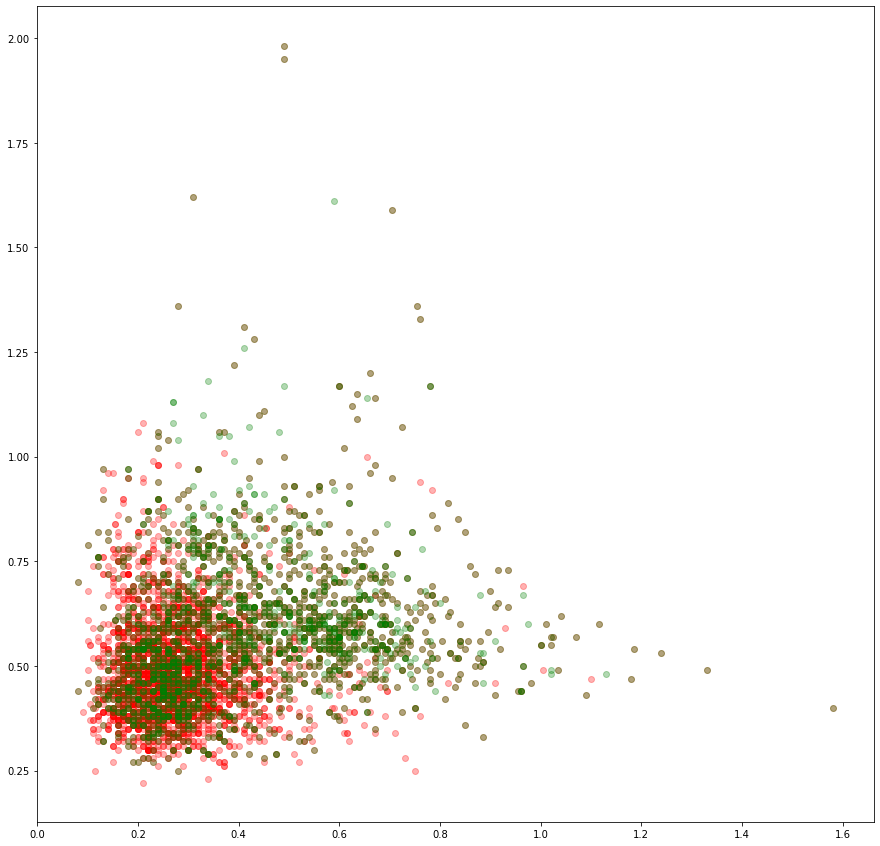

In [123]:
red_index = train_y[train_y=='red'].index
white_index = train_y[train_y=='white'].index
plt.figure(figsize=(15,15))
plt.scatter(x=train_X.loc[white_index, 'volatile acidity'], y=train_X.loc[white_index, 'sulphates'], color='r', alpha=0.3)

plt.scatter(x=train_X.loc[red_index, 'volatile acidity'], y=train_X.loc[red_index, 'sulphates'], color='g',  alpha=0.3)

plt.show()

In [124]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’,max_depth=None, **kwargs)
                       
# criterion: entropy or gini

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample
"""


clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

$$Gini = 1-\sum_jp_j^2$$

In [125]:
clf.score(train_X, train_y)

0.9612068965517241

In [126]:
clf.score(test_X, test_y)

0.8996923076923077

In [131]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.8990769230769231